In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Decision Trees

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

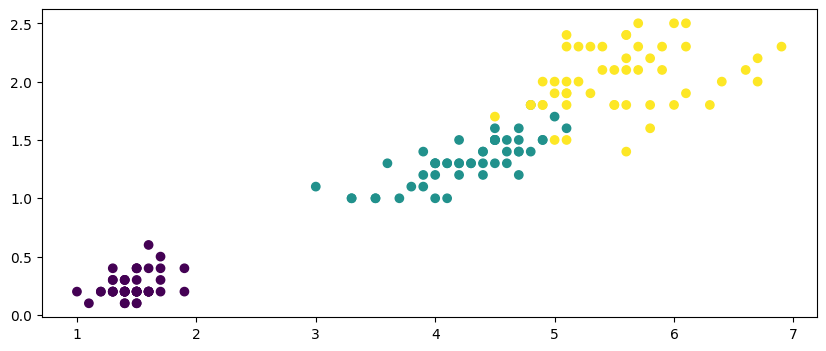

In [18]:
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [19]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Wizualizacja
Możesz wizualizować nauczone drzewo decyzyjne, najpierw używając metody **export_graphviz()**, aby stworzyć plik definicji wykresu o nazwie iris_tree.dot:

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="./iris_tree1.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Następnie możesz przekonwertować ten plik .dot na różne formaty, takie jak PDF lub PNG, za pomocą graphviz.

http://www.graphviz.org/

C:\Program Files (x86)\Graphviz2.38\bin

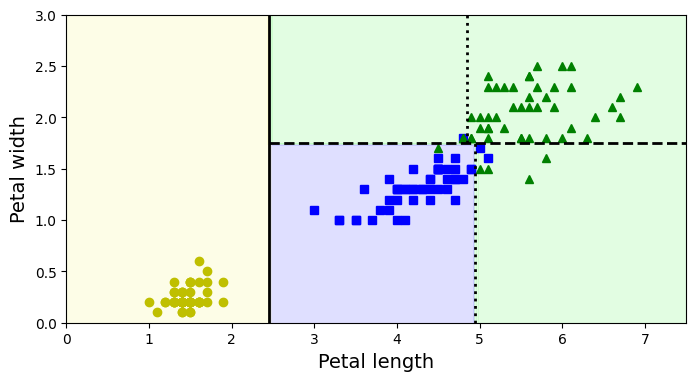

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [22]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [23]:
tree_clf.predict([[5, 1.5]])

array([2])

In [24]:
from mlxtend.plotting import plot_decision_regions

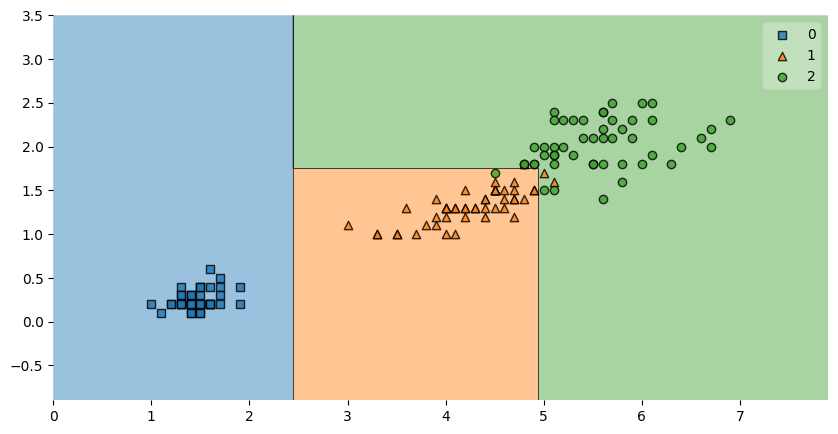

In [25]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf)
plt.show()

# Zad.

Naucz 

```pyrhon
DecisionTreeClassifier(max_depth=10, random_state=42)
```

* narysuj graf
* narysuj punkty oraz granice decyzyjne

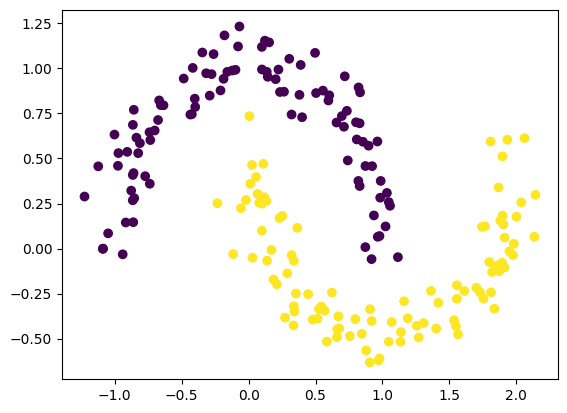

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

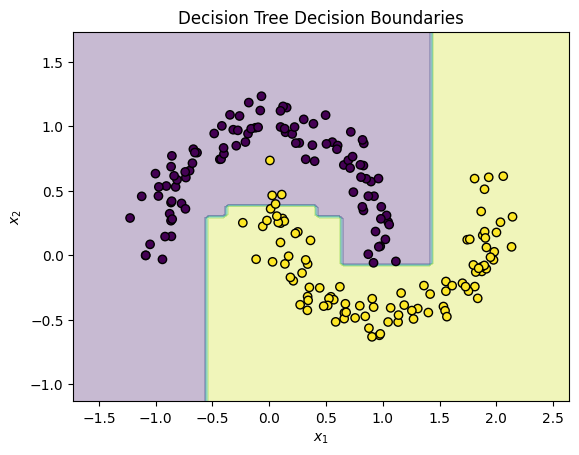

'Source.gv.pdf'

/snap/core20/current/lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.38' not found (required by /lib64/libduktape.so.207)
Failed to load module: /home/konrad/snap/code/common/.cache/gio-modules/libgiolibproxy.so
/bin/evince: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X, y)

def plot_decision_boundaries(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Decision Tree Decision Boundaries")
    plt.show()

plot_decision_boundaries(tree_clf, X, y)

dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=["x1", "x2"],
                           class_names=["class0", "class1"],
                           rounded=True, filled=True)

graph = graphviz.Source(dot_data)
graph.view()


# Zad.

Porównaj wyniki z 

```python
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
```

Metrics for Decision Tree with max_depth=10:
Accuracy: 0.89
Precision: 0.8881118881118881
Recall: 0.8819444444444444
F1 Score: 0.8850174216027874
ROC AUC: 0.889690170940171

Metrics for Decision Tree with min_samples_leaf=4:
Accuracy: 0.9
Precision: 0.88
Recall: 0.9166666666666666
F1 Score: 0.8979591836734694
ROC AUC: 0.9006410256410255


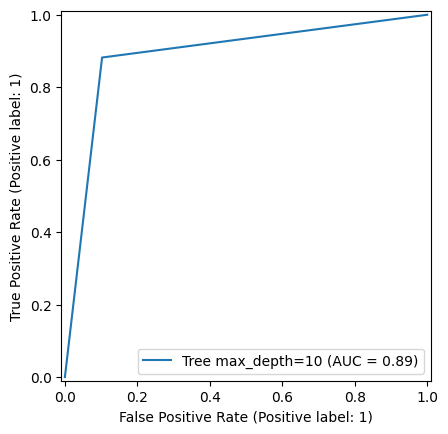

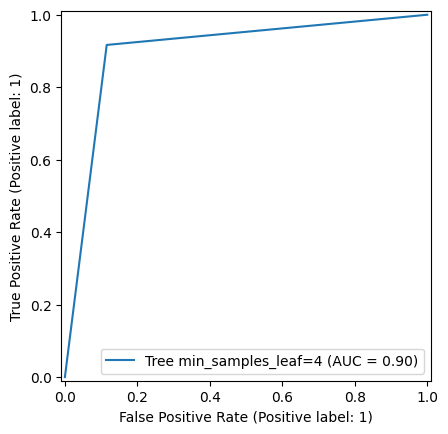

In [4]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf1 = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

tree_clf1.fit(X_train, y_train)
tree_clf2.fit(X_train, y_train)

y_pred1 = tree_clf1.predict(X_test)
y_pred2 = tree_clf2.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, y_pred1)

accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)
roc_auc2 = roc_auc_score(y_test, y_pred2)

print("Metrics for Decision Tree with max_depth=10:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_score1)
print("ROC AUC:", roc_auc1)

print("\nMetrics for Decision Tree with min_samples_leaf=4:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_score2)
print("ROC AUC:", roc_auc2)

RocCurveDisplay.from_predictions(y_test, y_pred1, name="Tree max_depth=10")
RocCurveDisplay.from_predictions(y_test, y_pred2, name="Tree min_samples_leaf=4")
plt.show()


In [27]:
!dot -Tpng moons_tree2.dot -o moons_tree2.png

zsh:1: command not found: dot


# Zad 

Dla obu wyników policz 

* precision
* recall
* f1-score
* accuracy
* roc_auc_score

i narysuj krzywą roc